# Most Used and Viewed Tags in Data Exchange

Scenario: 

we work in a company that creates data science content. The task is to figure what what is the beset content to write about.

We will use the Data Science Stack Exchange (DSSE) data to complete this analysis.

https://datascience.stackexchange.com/

The Data Science Exchange has a Stack Exchange Data Explorer (SEDE) in which we can query their database post information. 

https://data.stackexchange.com/

The most promising of the tables in this database are the Tags table, which contains a count of tags applied to posts. We can also use the Posts table which has a value for the total ViewCount, Score value, based on users upvoting/downvoting each post, favorite count, and comment count. All of which should enable us to figure out which types of topics are most common.

In [24]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
df = pd.read_csv('data_posts.csv')

In [3]:
df.shape

(10282, 8)

In [4]:
df.head()

,Id,PostTypeId,CreationDate,Score,Viewcount,Tags,AnswerCount,FavoriteCount
0,62542,1,2019-11-01 19:11:02,1,13,<python><deep-learning><tensorflow><preprocess...,0,NaN
1,62547,1,2019-11-01 19:44:09,1,16,<machine-learning><classification><regression>,1,NaN
2,62548,1,2019-11-01 20:00:47,0,44,<r><missing-data>,1,NaN
3,62549,1,2019-11-01 20:20:21,1,98,<python><scikit-learn><scipy>,1,NaN
4,62550,1,2019-11-01 20:30:20,0,51,<machine-learning><classification><scikit-lear...,1,NaN


In [5]:
# checking for null values in our dataset
df.isnull().sum()

Id                  0
PostTypeId          0
CreationDate        0
Score               0
Viewcount           0
Tags                0
AnswerCount         0
FavoriteCount    8661
dtype: int64

In [6]:
# checking datatypes
df.dtypes

Id                 int64
PostTypeId         int64
CreationDate      object
Score              int64
Viewcount          int64
Tags              object
AnswerCount        int64
FavoriteCount    float64
dtype: object

Notes on our dataset so far:

The dataset has a lot of nulls in ViewCount, Tags, AnswerCount, and mostly in FavoriteCount. FavoriteCount has mostly null values so we may not be using that field. Tags has all the tags in one cell seperated by <tag>. Datatypes are mostly correct except for CreationDate.

In [7]:
# converting CreationDate to datetime type; we could have done this when we read in the data by using parse_dates
df['CreationDate'] = pd.to_datetime(df['CreationDate'])

In [8]:
df.dtypes

Id                        int64
PostTypeId                int64
CreationDate     datetime64[ns]
Score                     int64
Viewcount                 int64
Tags                     object
AnswerCount               int64
FavoriteCount           float64
dtype: object

In [9]:
# we'll fill in all the missing values above with zeros
df.fillna(0, inplace=True)

In [10]:
# we're gong to convert tags to comma seperated values
df['Tags'] = df['Tags'].str.replace('><',',').str.replace('<','').str.replace('>',"")

In [11]:
df.sample(3)

,Id,PostTypeId,CreationDate,Score,Viewcount,Tags,AnswerCount,FavoriteCount
8923,48697,1,2019-04-05 14:25:07,1,528,"python,keras,tensorflow,loss-function,autoencoder",1,0.0
1455,62833,1,2019-11-07 13:09:09,2,45,"machine-learning,neural-network,classification...",1,0.0
804,54737,1,2019-06-29 10:42:19,0,20,"machine-learning,clustering,unsupervised-learn...",0,0.0


In [12]:
df['Tags'] = df['Tags'].str.split(',')

In [13]:
df.sample(3)

,Id,PostTypeId,CreationDate,Score,Viewcount,Tags,AnswerCount,FavoriteCount
129,54313,1,2019-06-23 01:25:13,0,243,"[neural-network, distribution, gaussian, opena...",1,0.0
8487,48208,1,2019-03-29 10:37:17,1,59,"[machine-learning, decision-trees, information...",1,1.0
3887,55641,1,2019-07-14 12:49:57,0,39,"[machine-learning, deep-learning, tensorflow, ...",0,0.0


In [14]:
# We'll now foucs on determining the most popular tags
# This counts the number tags used in all question posts from 1/1/2019 forward
tag_count = dict()

for tags in df['Tags']:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1

In [15]:
# Converting the dictionary into a dataframe
tag_count = pd.DataFrame.from_dict(tag_count, orient='index')
tag_count.rename(columns={0:'count'}, inplace=True)

In [16]:
# creating a most used tags by getting the top 15
# the sorting and grabbing the tail is important when we plot it below to show highest to lowest in the graph
most_used_tags = tag_count.sort_values(by='count', ascending=True).tail(15)
most_used_tags

,count
dataset,394
regression,405
pandas,416
lstm,446
time-series,517
cnn,561
nlp,592
scikit-learn,628
tensorflow,677
classification,779


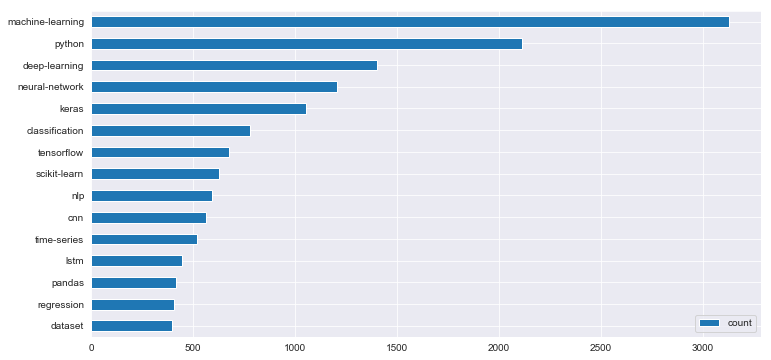

In [17]:
# plotting our most_used_tags
most_used_tags.plot(kind='barh', figsize=(12,6))

In [18]:
# for the views we will use the same methodology above but also use the enummerate function to itirate 
# iterate gives us the index of the item
test = "Name = Carlos"

for i,c in enumerate(test):
    print(i,c)

0 N
1 a
2 m
3 e
4  
5 =
6  
7 C
8 a
9 r
10 l
11 o
12 s


In [19]:
# This sums the number views per tag in all question posts from 1/1/2019 forward
tag_view_count = dict()

for i, tags in enumerate(df['Tags']):
    for tag in tags:
        if tag in tag_view_count:
            tag_view_count[tag] += df['Viewcount'].loc[i]
        else:
            tag_view_count[tag] = 1

In [20]:
tag_views = pd.DataFrame.from_dict(tag_view_count, orient='index')
tag_views.rename(columns={0:'ViewCount'}, inplace=True)
tag_views.head()

,ViewCount
python,752682
deep-learning,309988
tensorflow,170574
preprocessing,25388
numpy,72089


In [21]:
most_viewed_tags = tag_views.sort_values(by='ViewCount').tail(15)
most_viewed_tags

,ViewCount
numpy,72089
time-series,86535
cnn,96997
lstm,98126
nlp,104189
dataframe,125703
classification,139177
tensorflow,170574
scikit-learn,177500
neural-network,250411


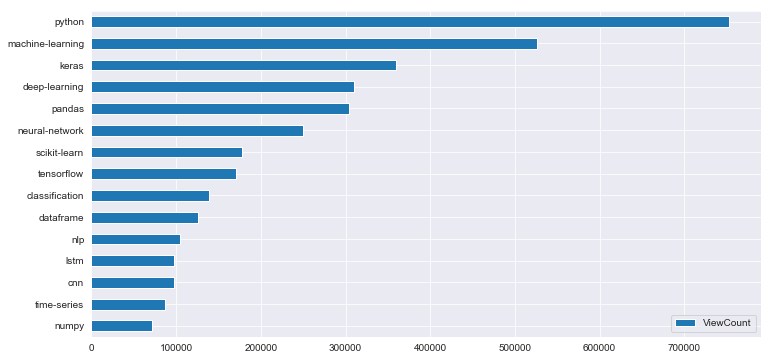

In [22]:
most_viewed_tags.plot(kind='barh', figsize=(12,6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DA82A316A0>],
      dtype=object)

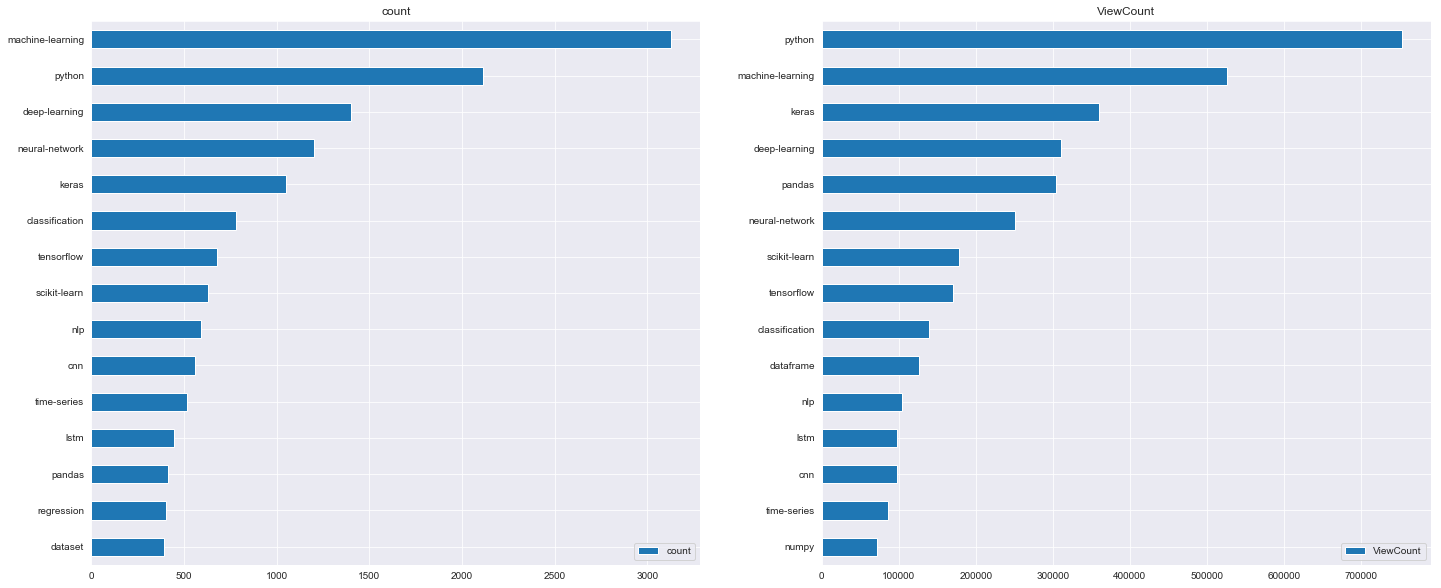

In [25]:
# plotting them next to each other
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches(24,10)
most_used_tags.plot(kind='barh', ax=axes[0], subplots=True)
most_viewed_tags.plot(kind='barh', ax=axes[1], subplots=True)

Based on the graphs above we can determine that pythong and machine learning, deep learning are the most popular tags